# Easy Grozery

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Afnan\OneDrive\Desktop\RESUME PROJECT\Easy_Grozery\easygrozery.csv")

In [5]:
df

,Transaction_ID,Date,Time,Customer_ID,Item_Category,Item_Name,Quantity,Unit_Price,Discount,Total_Amount,Payment_Method
0,1001,2025-01-01,10:15,CUST001,Groceries,Rice (5kg),1,250,0,250,Cash
1,1002,2025-01-01,10:20,CUST002,Dairy,Milk (1 liter),2,45,5,85,Card
2,1003,2025-01-01,11:00,CUST003,Bakery,Bread,1,30,0,30,Card
3,1004,2025-01-02,12:30,CUST001,Personal Care,Shampoo,1,120,10,110,UPI
4,1005,2025-01-02,14:00,CUST004,Groceries,Lentils (1kg),2,80,0,160,Cash
5,1006,2025-01-03,16:45,CUST005,Household,Detergent (500g),1,100,0,100,Card
6,1007,2025-01-03,17:00,CUST006,Groceries,Sugar (1kg),1,40,0,40,UPI
7,1008,2025-01-04,09:30,CUST007,Dairy,Cheese (200g),1,150,15,135,Cash
8,1009,2025-01-04,10:00,CUST008,Groceries,Cooking Oil (1L),1,200,0,200,Card
9,1010,2025-01-04,11:15,CUST009,Bakery,Biscuits,3,20,0,60,UPI


In [6]:
df.describe()

,Transaction_ID,Quantity,Unit_Price,Discount,Total_Amount
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,1005.50000,1.400000,103.500000,3.000000,117.000000
std,3.02765,0.699206,77.174046,5.374838,70.600598
min,1001.00000,1.000000,20.000000,0.000000,30.000000
25%,1003.25000,1.000000,41.250000,0.000000,66.250000
50%,1005.50000,1.000000,90.000000,0.000000,105.000000
75%,1007.75000,1.750000,142.500000,3.750000,153.750000
max,1010.00000,3.000000,250.000000,15.000000,250.000000


In [11]:
df.isnull().sum()

Transaction_ID    0
Date              0
Time              0
Customer_ID       0
Item_Category     0
Item_Name         0
Quantity          0
Unit_Price        0
Discount          0
Total_Amount      0
Payment_Method    0
dtype: int64

## 1.Sales Trend Analysis:

### Daily/Weekly/Monthly Trends: Compute total sales per day or week and visualize trends over time. Are there specific days when sales peak?

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

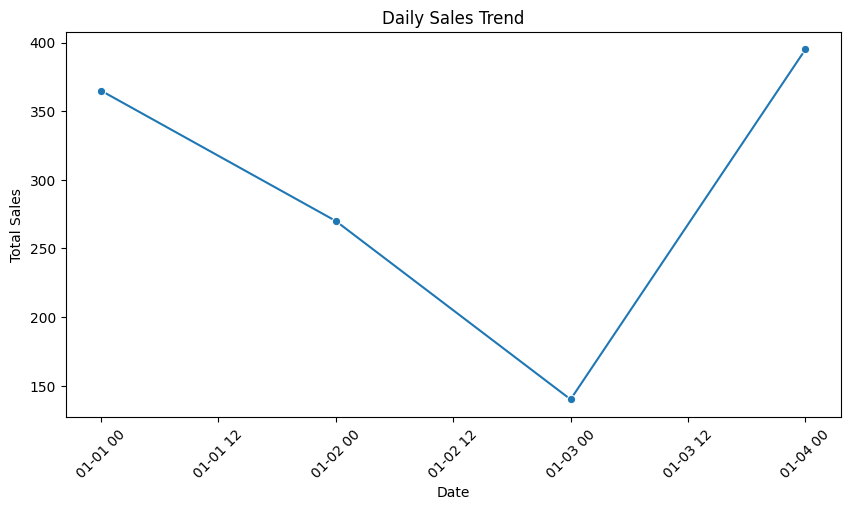

In [17]:
daily_sales = df.groupby('Date')['Total_Amount'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Insights for Daily sales Trend:


#### Sales Trend Overview:
The store experienced a steady decline in sales over the first three days, followed by a sharp recovery on the fourth day.

#### Potential Causes: 
Analyze operational, marketing, and external influences for the drop on Day 3 and the spike on Day 4.

#### Actionable Recommendations:
Introduce promotions or discounts during periods of low sales to drive traffic.

Ensure adequate stock availability to avoid sales drops.

Plan marketing campaigns aligned with external factors (holidays, events) to sustain consistent sales growth.

### Time-of-Day Analysis: Identify peak hours during store operation (e.g. compare morning vs. evening sales).

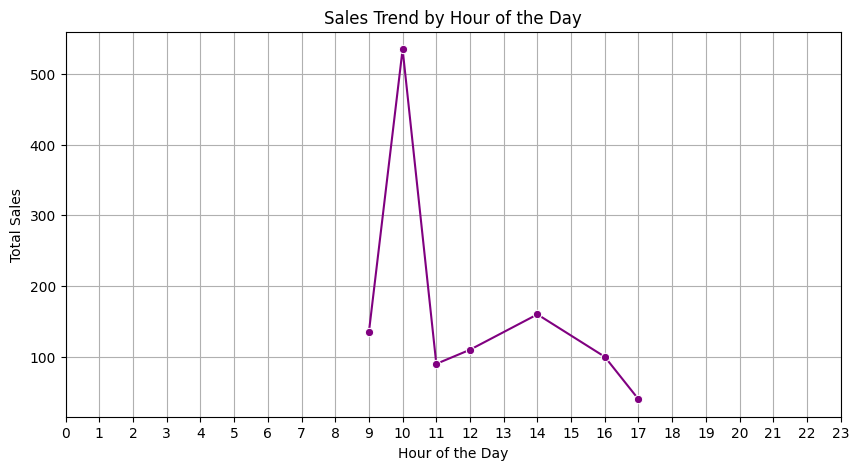

In [23]:
hourly_sales = df.groupby('Hour')['Total_Amount'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='purple')
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Insights for  sales Trend By Hour Of The Day:

#### Store’s Busiest Hour:
The store sees its highest activity at 10 AM, making it the most critical time for operations.
#### Optimization Opportunities:
Increase staff availability during peak hours (9–11 AM) to handle the rush efficiently.

Consider running morning promotions or special offers to attract even more customers during this period.
#### Afternoon Focus:
There is moderate activity in the afternoon (1–4 PM), so light promotions or targeted marketing during this time might help increase sales.
#### Low Evening Sales:
The evening period shows lower sales, so operational adjustments like reducing staff or energy usage could be considered.

## 2.Category & Product Performance:

### Top-Selling Categories: Which item categories (e.g. Groceries vs. Dairy) generate the highest revenue?

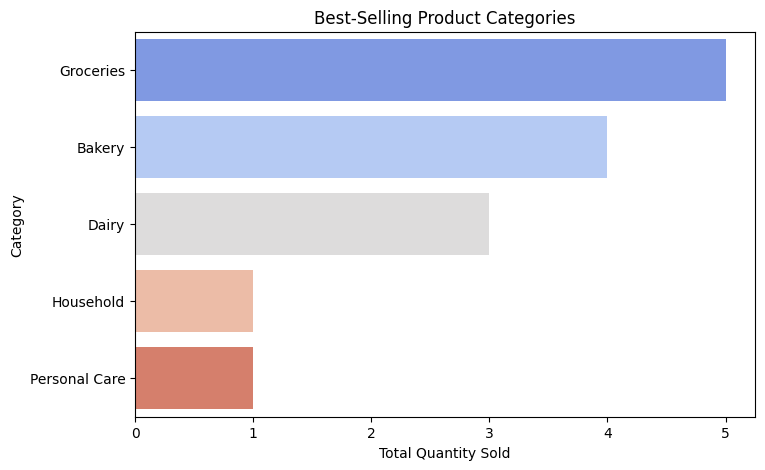

In [48]:
top_categories = df.groupby('Item_Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette='coolwarm')
plt.title("Best-Selling Product Categories")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")
plt.show()

## Key Insights

#### Top-Performing Category

Groceries: Leads as the best-selling category, indicating strong customer demand for grocery items.

Implication: Focus on maintaining stock levels and quality for grocery items to sustain high sales.

#### Secondary Performers

Bakery: Second-highest sales, suggesting consistent demand for bakery products.

Dairy: Moderate sales, reflecting steady but lower demand compared to groceries and bakery.

#### Lower-Performing Categories

Household and Personal Care: Significantly lower sales compared to groceries, bakery, and dairy.

Implication: These categories may require targeted promotions or better visibility to boost sales.

## Best-Selling Products: Within each category, identify products with the highest sales volume or revenue.

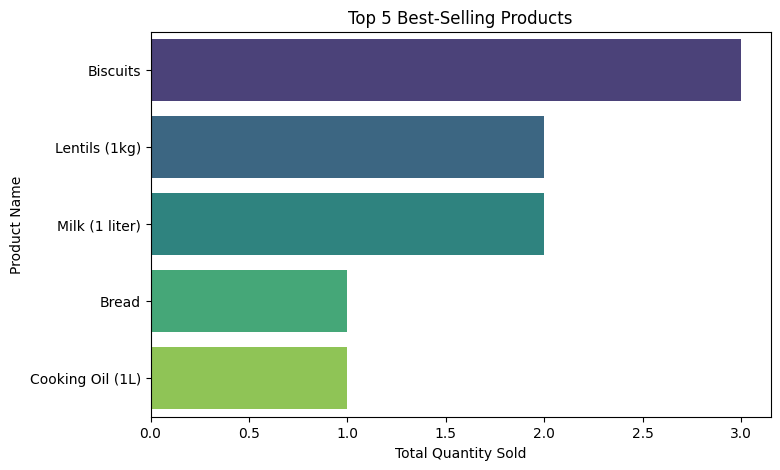

In [47]:
top_products = df.groupby('Item_Name')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis')
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


### Insights

#### Top-Selling Products: 
The top 5 best-selling products are identified as Biscuits, Milk (1 liter), Bread, and Cooking Oil (1L).

These products are likely the most popular and contribute significantly to your sales.

#### Product Popularity: 
The list indicates which products are in high demand, which can help in inventory planning and marketing strategies.

#### Data Visualization: 
The graph or chart (implied by the x-axis labels from 0.0 to 3.0) is intended to show the total quantity sold for each product. Ensure that the actual data is populated to provide a clear visual representation of sales performance.

## Discount Impact:

### Discount Effectiveness: Analyze how discounts affect the total amount per transaction. Do transactions with discounts lead to higher sales volume or profit margins?

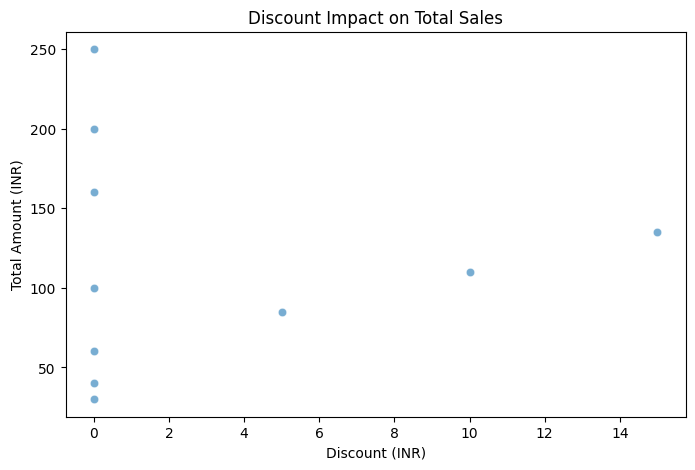

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Total_Amount'], alpha=0.6)
plt.title("Discount Impact on Total Sales")
plt.xlabel("Discount (INR)")
plt.ylabel("Total Amount (INR)")
plt.show()

## Insights

#### No Strong Trend Observed:

If the points are randomly scattered without a clear pattern, there is no strong correlation between discounts and sales.

This suggests that offering discounts does not significantly increase total sales for this dataset.

#### Possible Outliers:

Check if there are a few extreme values where either very high discounts yielded unusually low sales or very low discounts resulted in high sales. 

These outliers could indicate inefficiencies in the discounting strategy or product-specific trends.

#### Clusters:

Look for clusters of data points where certain discount ranges consistently result in higher sales. If no such clusters exist, discounts might not drive customer behavior significantly.

## Payment Method Insights:

### Payment Method Distribution: Visualize the frequency of different payment methods (Cash, Card, UPI). Is there a dominant method among your customers?

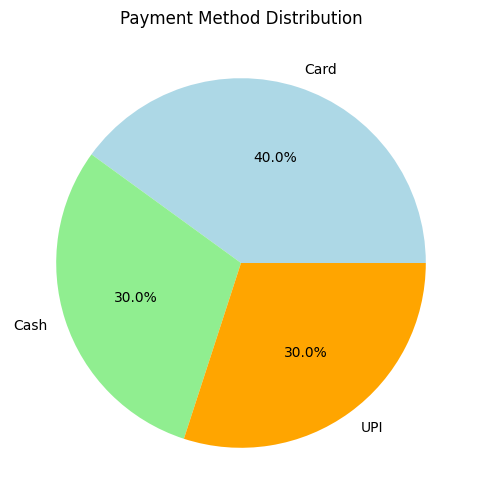

In [53]:
payment_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(6, 6))
payment_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange'])
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.show()

### Insights:

#### Payment Method Breakdown:

Card: 40.0%

Cash: 30.0%

UPI: 30.0%

#### Dominant Payment Method:

Card payments are the most popular, accounting for 40% of all transactions. This indicates a strong preference for card-based payments among customers.

#### Equal Preference for Cash and UPI:

Both cash and UPI payments each account for 30% of the transactions. This shows that while digital payments (UPI) are gaining traction, cash remains equally significant.

#### Digital Payment Adoption:

The combined percentage of card and UPI payments (70%) suggests a high adoption rate of digital payment methods.

## Customer Behavior & Loyalty:

### Repeat Purchase Analysis: Identify repeat customers using the Customer_ID field. What percentage of sales comes from returning customers?

In [54]:
customer_frequency = df['Customer_ID'].value_counts()
repeat_customers = customer_frequency[customer_frequency > 1].count()
total_customers = customer_frequency.count()
repeat_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Customer Rate: {repeat_rate:.2f}%")

Repeat Customer Rate: 11.11%


### Insights

The repeat customer rate is an important indicator of customer loyalty.

A high repeat rate suggests satisfied customers who frequently return, which is a positive sign for business sustainability.

A low repeat rate may highlight the need for strategies like loyalty programs or improved customer service to retain customers.

## Profitability Analysis (Optional Extension):

In [62]:
def calculate_selling_price(row):
    return row['Unit_Price'] * row['Quantity'] * 1.1
df['Selling_Price'] = df.apply(calculate_selling_price, axis=1)

In [65]:
df['Profit'] = df['Selling_Price'] - df['Unit_Price']

### Calculate Profit Margins: If you add cost data (e.g. cost price of items), calculate profit margins per category or product.

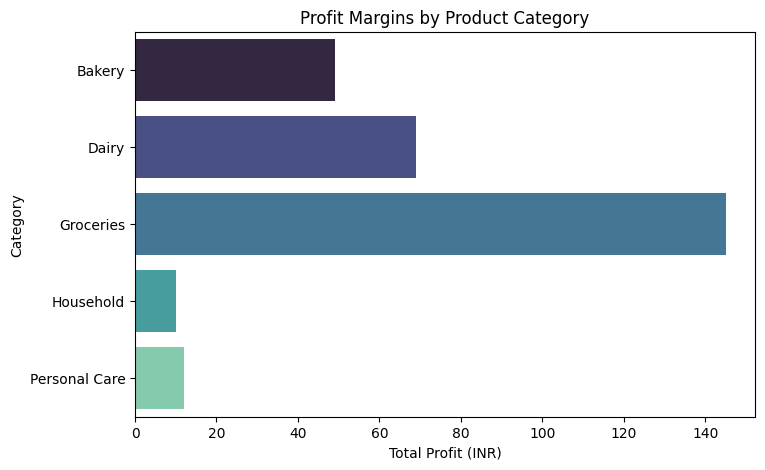

In [68]:
category_profit_margin = df.groupby('Item_Category')['Profit'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_profit_margin.values, y=category_profit_margin.index, hue=category_profit_margin.index, palette='mako')
plt.title("Profit Margins by Product Category")
plt.xlabel("Total Profit (INR)")
plt.ylabel("Category")
plt.show()

### Insights:

#### Groceries , dairy and bakery categories show the highest total profits, indicating strong market demand and effective pricing strategies.

#### Household and personal Care categories have lower profit margins, suggesting a need for strategic improvements such as cost optimization or targeted promotions.

#### The overall profit distribution highlights the importance of focusing on high-performing categories while addressing challenges in less profitable areas.

## correlation heatmap

In [76]:
df_selected = df[['Quantity', 'Total_Amount', 'Profit']]

In [77]:
correlation_matrix = df_selected.corr()

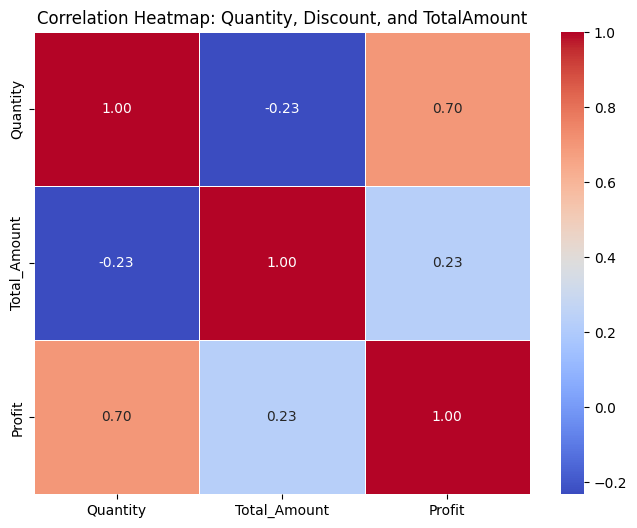

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Quantity, Discount, and TotalAmount')
plt.show()